In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
y, sr = librosa.load("music_files/Rolling in the Deep (Official Music Video).mp3")

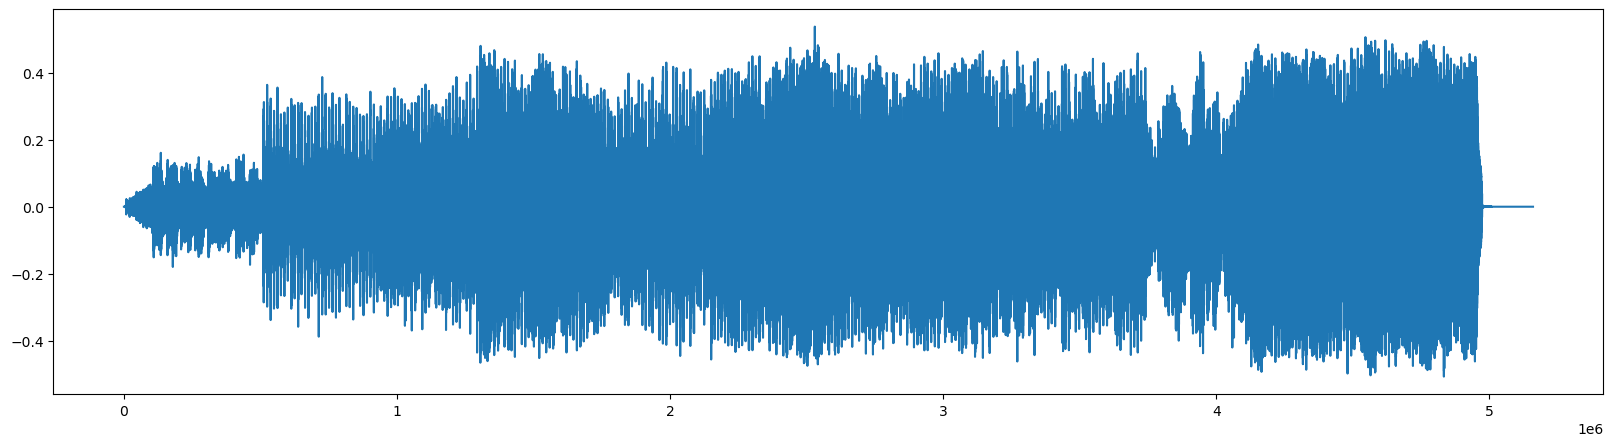

In [3]:
plt.figure(figsize=(20,5))
plt.plot(y)

In [4]:
mfccs = librosa.feature.mfcc(y=y, sr=sr)

In [5]:
mfccs.shape

(20, 10079)

In [6]:
chroma = librosa.feature.chroma_stft(y=y, sr=sr)

In [7]:
chroma.shape

(12, 10079)

In [8]:
spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)

In [9]:
spectral_contrast.shape

(7, 10079)

In [10]:
features = np.vstack([mfccs, chroma, spectral_contrast])

In [11]:
features

array([[-589.28295898, -589.28295898, -589.28295898, ..., -589.28295898,
        -589.28295898, -589.28295898],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [  12.45568033,   12.45568033,   12.45568033, ...,   12.45568033,
          12.45568033,   12.45568033],
       [  12.45568033,   12.45568033,   12.45568033, ...,   12.45568033,
          12.45568033,   12.45568033],
       [  12.45568033,   12.45568033,   12.45568033, ...,   12.45568033,
          12.45568033,   12.45568033]])

In [12]:
mean = np.mean(features, axis=1, keepdims=True)
std = np.std(features, axis=1, keepdims=True)
scaled_features = (features - mean) / std

In [13]:
scaled_features

array([[-3.44297827, -3.44297827, -3.44297827, ..., -3.44297827,
        -3.44297827, -3.44297827],
       [-2.95494878, -2.95494878, -2.95494878, ..., -2.95494878,
        -2.95494878, -2.95494878],
       [-0.12822869, -0.12822869, -0.12822869, ..., -0.12822869,
        -0.12822869, -0.12822869],
       ...,
       [-1.64472793, -1.64472793, -1.64472793, ..., -1.64472793,
        -1.64472793, -1.64472793],
       [-1.44906945, -1.44906945, -1.44906945, ..., -1.44906945,
        -1.44906945, -1.44906945],
       [-4.92492317, -4.92492317, -4.92492317, ..., -4.92492317,
        -4.92492317, -4.92492317]])

In [14]:
def extract_features(file_path: str) -> np.ndarray:
    y, sr = librosa.load(file_path, duration=180)
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)

    features = np.vstack([mfccs, chroma, spectral_contrast])

    mean = np.mean(features, axis=1, keepdims=True)
    std = np.std(features, axis=1, keepdims=True)
    scaled_features = (features - mean) / std

    return scaled_features.astype(np.float32)

In [15]:
uptown_features = extract_features("music_files/Uptown Funk (Official Video).mp3")
shape_of_you = extract_features("music_files/Shape of You.mp3")

In [16]:
print(uptown_features.shape)
print(shape_of_you.shape)

(39, 7752)
(39, 7752)


In [52]:
from glob import glob
from tqdm.auto import tqdm
from librosa import feature
import numpy as np

In [32]:
fn_list_i = [
 feature.chroma_stft,
 feature.spectral_centroid,
 feature.spectral_bandwidth,
 feature.spectral_rolloff
]
 
fn_list_ii = [
 feature.rms,
 feature.zero_crossing_rate
]

def get_feature_vector(y,sr): 
   feat_vect_i = [np.mean(funct(y=y,sr=sr)) for funct in fn_list_i]
   feat_vect_ii = [np.mean(funct(y=y)) for funct in fn_list_ii] 
   feature_vector = feat_vect_i + feat_vect_ii 
   return np.array(feature_vector).astype(np.float32)

In [53]:
music_files_list = glob("music_files/" + '*.mp3')

In [54]:
norm_audios_feat = []
for file in tqdm(music_files_list):
    feature_vector = get_feature_vector(y, sr)
    norm_audios_feat.append(feature_vector)

  0%|          | 0/197 [00:00<?, ?it/s]

In [59]:
audios = np.array(norm_audios_feat)

In [62]:
audios.shape[1]

6

In [57]:
import faiss

In [79]:
index = faiss.IndexFlatL2(audios.shape[1])

In [80]:
audios.dtype

dtype('float64')

In [82]:
for i in audios.astype(np.float32):
    index.add(i.reshape(1,-1))

In [83]:
index

<faiss.swigfaiss.IndexFlatL2; proxy of <Swig Object of type 'faiss::IndexFlatL2 *' at 0x7f30cc6d2fa0> >

In [103]:
test_y, test_sr = librosa.load("music_files/A Sky Full of Stars - Radio Edit.mp3")

In [104]:
test_feature_vector = get_feature_vector(test_y, test_sr)

In [105]:
test_feature_vector = np.array(test_feature_vector)

In [106]:
distances, indices = index.search(test_feature_vector.reshape(1,-1).astype(np.float32), k=5)

In [108]:
index.is_trained

True